In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.preprocessing import KernelCenterer

# Week-2

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. Ignore the vector $y$. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [21]:
X, y = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)

## Problem 1
Plot the dataset using matplotlib.

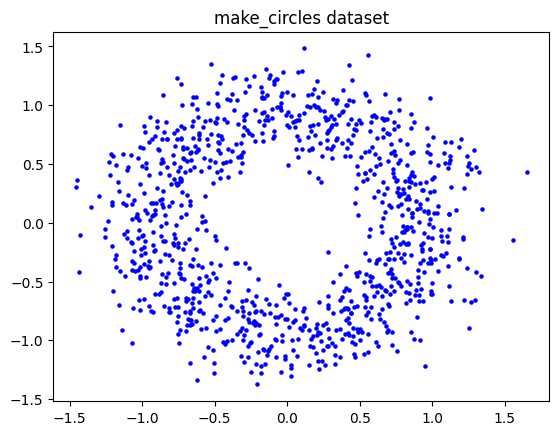

In [22]:
# Problem 1: Plot dataset
plt.scatter(X[:, 0], X[:, 1], c='blue', s=5)
plt.title("make_circles dataset")
plt.show()

## Problem 2
How many samples are there in the dataset?


In [23]:
# Problem 2: Count samples
n_samples = X.shape[0]
n_samples

1000

## Problem 3
How many features are there in the dataset?

In [24]:
# Problem 3: Count features
n_features = X.shape[1]
n_features

2

## Problem 4
Find the kernel matrix $K$ using the polynomial kernel with degree $2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [25]:
# Problem 4: Polynomial kernel degree=2
K_poly = polynomial_kernel(X, degree=2)
scalar_poly = np.sqrt(np.sum(K_poly**2) / (n_samples**2))
print(f"Polynomial kernel scalar: {scalar_poly:.2f}")

Polynomial kernel scalar: 1.33


## Problem 5
Find the kernel matrix $K$ using the Gaussian kernel with parameter $\sigma = 2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [26]:
# Problem 5: Gaussian kernel with sigma=2
def gaussian_kernel(X, sigma=2):
    pairwise_sq_dists = np.sum((X[:, None, :] - X[None, :, :]) ** 2, axis=2)
    K = np.exp(-pairwise_sq_dists / (2 * sigma**2))
    return K

K_gauss = gaussian_kernel(X, sigma=2)
scalar_gauss = np.sqrt(np.sum(K_gauss**2) / (n_samples**2))
print(f"Gaussian kernel scalar: {scalar_gauss:.2f}")

Gaussian kernel scalar: 0.81


## Problem 6
Find the center of the kernel matrix $K$ obtained in problem 2. Call this centered matrix $KC$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} KC_{ij}^2}
$$

In [27]:
# Problem 6: Centering polynomial kernel matrix
centerer = KernelCenterer()
Kc_poly = centerer.fit_transform(K_poly)
scalar_centered_poly = np.sqrt(np.sum(Kc_poly**2) / (n_samples**2))
print(f"Centered polynomial kernel scalar: {scalar_centered_poly:.2f}")

Centered polynomial kernel scalar: 0.70


## Problem 7
Find the projections (scalar) of all the data points on to the first two principal components obtained using polynomial kernel of degree 2.

<u>Conversion</u>

if $\alpha_1, \alpha_2, ..., \alpha_n$ are the prjections on the first PC and $\beta_1, \beta_2, ..., \beta_n$ are the projections on the second PC, enter the following quantity as your answer correct to two decimal places:

$$\sum_{i = 1}^{n} \alpha_i + \sum_{i = 1}^{n} \beta_i$$

In [28]:
# Problem 7: Kernel PCA & projections on first two PCs of polynomial kernel matrix
# Eigen decomposition of centered K_poly
eigvals, eigvecs = np.linalg.eigh(Kc_poly)

# Sort eigenvalues and eigenvectors descending
idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]

# First two principal components projections (alphas and betas)
alpha = eigvecs[:, 0]  # projections on first PC
beta = eigvecs[:, 1]   # projections on second PC

scalar_proj_sum = np.sum(np.abs(alpha)) + np.sum(np.abs(beta))
print(f"Sum of absolute projections on first two PCs: {scalar_proj_sum:.2f}")

Sum of absolute projections on first two PCs: 55.61
